In [37]:
import swan_vis as swan

In [38]:
annot = '/home/ubuntu/ECCB2022/data/reference/gencode.v40.annotation.encode_pilot_regions.gtf'
gtf = 'h1_talon.gtf'
ab = 'h1_talon_abundance.tsv'

sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf)
sg.add_abundance(ab)



Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph


/home/ubuntu/anaconda3/envs/swan_talon/lib/python3.7/site-packages/swan_vis/swangraph.py:303: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(var=var, obs=obs, X=X)



Adding abundance for datasets PacBio_cDNA_H1_DE_1_alignments_ENCFF362CPC_subset, PacBio_cDNA_H1_DE_2_alignments_ENCFF168AZV_subset, PacBio_cDNA_H1_DE_3_alignments_ENCFF940WVU_subset, PacBio_cDNA_H1_ESC_1_alignments_ENCFF213XDA_subset, PacBio_cDNA_H1_ESC_2_alignments_ENCFF281VKZ_subset... (and 1 more) to SwanGraph
Calculating TPM...
Calculating PI...
Calculating edge usage...


/home/ubuntu/anaconda3/envs/swan_talon/lib/python3.7/site-packages/swan_vis/swangraph.py:686: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(var=var, obs=obs, X=X)
/home/ubuntu/anaconda3/envs/swan_talon/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...


/home/ubuntu/anaconda3/envs/swan_talon/lib/python3.7/site-packages/swan_vis/swangraph.py:617: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(var=var, obs=obs, X=X)


Calculating TES usage...


In [39]:
sg.save_graph('swan')

Saving graph as swan.p


In [40]:
# add metadata
m = {'PacBio_cDNA_H1_DE_1_alignments_ENCFF362CPC_subset': 'h1_de_1',
     'PacBio_cDNA_H1_DE_2_alignments_ENCFF168AZV_subset': 'h1_de_2',
     'PacBio_cDNA_H1_DE_3_alignments_ENCFF940WVU_subset': 'h1_de_3',
     'PacBio_cDNA_H1_ESC_1_alignments_ENCFF213XDA_subset': 'h1_1',
     'PacBio_cDNA_H1_ESC_2_alignments_ENCFF281VKZ_subset': 'h1_2',
     'PacBio_cDNA_H1_ESC_3_alignments_ENCFF250BDM_subset': 'h1_3'}
sg.adata.obs['sample'] = sg.adata.obs.dataset.map(m)
# sg.adata.obs.head()
meta = sg.adata.obs.copy(deep=True)
meta['cell_type'] = meta['sample'].str.rsplit('_', n=1, expand=True)[0]

meta = meta[['dataset', 'sample', 'cell_type']]
meta.to_csv('swan_metadata.tsv', sep='\t', index=False)
meta = 'swan_metadata.tsv'
sg.add_metadata(meta)

# add colors for h1 and h1_de
c_dict = {'h1': 'darkorchid', 'h1_de': 'darkgoldenrod'}
sg.set_metadata_colors('cell_type', c_dict)

sg.save_graph('swan')

Saving graph as swan.p


/home/ubuntu/anaconda3/envs/swan_talon/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [41]:
# intron retention and exon skipping
es_df = sg.find_es_genes(verbose=False)
ir_df = sg.find_ir_genes(verbose=False)

Analyzing 44 intronic edges for ES
Found 11 novel es events in 6 transcripts.
Analyzing 74 exonic edges for IR
Found 1 novel ir events in 1 transcripts.


In [42]:
ir_df.head()

,gid,tid,edge_id
0,ENSG00000203879.12,ENCODEHT000013655,22042


In [43]:
ir_tid = ir_df.tid.tolist()[0]
ir_gid = ir_df.gid.tolist()[0]

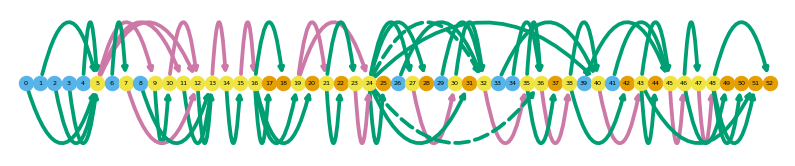

In [44]:
# inspect a gene with IR and ES
sg.plot_graph(ir_gid, indicate_novel=True)

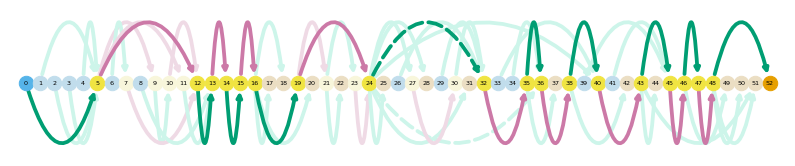

In [45]:
sg.plot_transcript_path(ir_tid, indicate_novel=True)

In [46]:
es_df.head()

,gid,tid,edge_id
0,ENSG00000143398.20,ENCODEHT000005499,21998
0,ENSG00000143398.20,ENCODEHT000005499,21998
0,ENSG00000143398.20,ENCODEHT000005499,21998
0,ENSG00000159352.16,ENCODEHT000006265,22001
0,ENSG00000121236.21,ENCODEHT000007224,22017


In [47]:
es_gid = es_df.gid.tolist()[0]
es_tid = es_df.tid.tolist()[0]

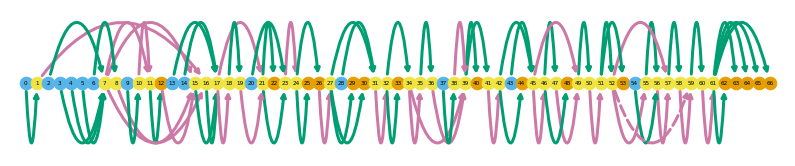

In [48]:
sg.plot_graph(es_gid, indicate_novel=True)

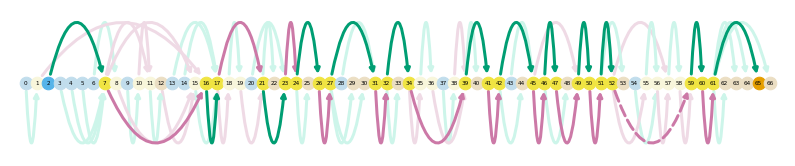

In [49]:
sg.plot_transcript_path(es_tid, indicate_novel=True)

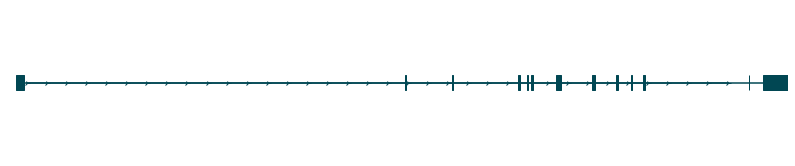

In [50]:
sg.plot_transcript_path(es_tid, browser=True)

In [51]:
obs_col = 'cell_type'
die, results = sg.die_gene_test(obs_col=obs_col, verbose=True)

Testing for DIE for each gene: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 337/337 [00:04<00:00, 80.76it/s]


In [52]:
die_df = sg.get_die_genes(obs_col=obs_col,
                          obs_conditions=['h1', 'h1_de'],
                          p=0.05, dpi=10)

In [53]:
def make_reports(gname):
    sg.gen_report(gname,
                  'figures/'+gname,
                  metadata_cols=['cell_type'],
                  cmap='viridis', 
                  transcript_col='tname',
                  novelty=True,
                  indicate_novel=True,
                  layer='tpm')

    sg.gen_report(gname,
                  'figures/'+gname,
                  metadata_cols=['cell_type'],
                  cmap='magma', 
                  transcript_col='tname',
                  novelty=True,
                  layer='pi',
                  browser=True)

In [54]:
make_reports('DES')
make_reports('POGZ')
make_reports('PI4KB')


Plotting transcripts for ENSG00000175084.13
Saving transcript path graph for ENST00000373960.4 as figures/DES_novel_ENST00000373960.4_path.png
Saving transcript path graph for ENST00000477226.6 as figures/DES_novel_ENST00000477226.6_path.png
Generating report for ENSG00000175084.13

Plotting transcripts for ENSG00000175084.13
Saving transcript path graph for ENST00000373960.4 as figures/DES_browser_ENST00000373960.4_path.png
Saving transcript path graph for ENST00000477226.6 as figures/DES_browser_ENST00000477226.6_path.png
Generating report for ENSG00000175084.13

Plotting transcripts for ENSG00000143442.22
Saving transcript path graph for ENST00000271715.7 as figures/POGZ_novel_ENST00000271715.7_path.png
Saving transcript path graph for ENST00000409503.5 as figures/POGZ_novel_ENST00000409503.5_path.png
Saving transcript path graph for ENST00000531094.5 as figures/POGZ_novel_ENST00000531094.5_path.png
Saving transcript path graph for ENST00000392723.5 as figures/POGZ_novel_ENST000003

In [55]:
tid = sg.t_df.loc[(sg.t_df.gname == 'PI4KB')&(sg.t_df.novelty!='Known')].tid.tolist()[0]

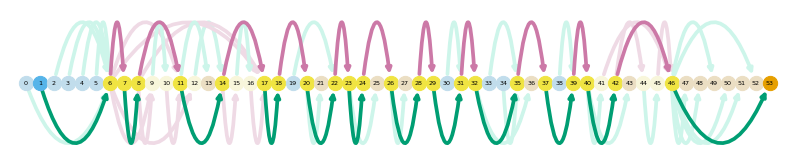

In [56]:
sg.plot_transcript_path(tid, indicate_novel=True)

In [57]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [58]:
sg.plot_each_transcript_in_gene('PI4KB', 'figures/pi4kb', indicate_novel=True)


Plotting 14 transcripts for ENSG00000143393.17
Saving transcript path graph for ENCODEHT000006913 as figures/pi4kb_novel_ENCODEHT000006913_path.png
Saving transcript path graph for ENST00000368872.5 as figures/pi4kb_novel_ENST00000368872.5_path.png
Saving transcript path graph for ENST00000368873.6 as figures/pi4kb_novel_ENST00000368873.6_path.png
Saving transcript path graph for ENST00000368874.8 as figures/pi4kb_novel_ENST00000368874.8_path.png
Saving transcript path graph for ENST00000368875.6 as figures/pi4kb_novel_ENST00000368875.6_path.png
Saving transcript path graph for ENST00000430800.5 as figures/pi4kb_novel_ENST00000430800.5_path.png
Saving transcript path graph for ENST00000438243.2 as figures/pi4kb_novel_ENST00000438243.2_path.png
Saving transcript path graph for ENST00000446339.1 as figures/pi4kb_novel_ENST00000446339.1_path.png
Saving transcript path graph for ENST00000455060.5 as figures/pi4kb_novel_ENST00000455060.5_path.png
Saving transcript path graph for ENST000004